# Fradulent Transaction Detection in Banking Sector

'''The following is the data pre-processing to build a predictive model to detect fradulent ATM transactions and possibly eliminate such transactions.
The datasets available includes:

- Geo_scores- data regarding location of transaction
- Lambda_wts- proprietary index
- Qset_tats- network turn around times
- Instances_scores- vulnerability qualification score
- Train and Test Dataset containing masked variables

The prediction target is column 'Target' where-
- 1: Fraudulent transactions
- 0: Clean transactions
'''

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#importing all the required datasets

geo= pd.read_csv(r'C:\\Users\\HP\\Downloads\\Geo_scores.csv')
instance= pd.read_csv(r'C:\\Users\\HP\\Downloads\\instance_scores.csv')
lmbda= pd.read_csv(r'C:\\Users\\HP\\Downloads\\Lambda_wts.csv')
qset= pd.read_csv(r'C:\\Users\\HP\\Downloads\\Qset_tats.csv')
train= pd.read_csv(r'C:\\Users\\HP\\Downloads\\train.csv')
test= pd.read_csv(r'C:\\Users\\HP\\Downloads\\test_share.csv')

In [3]:
#to check the number of rows and columns in each dataset

print(geo.shape)
print('*******************************')
print(instance.shape)
print('*******************************')
print(lmbda.shape)
print('*******************************')
print(qset.shape)
print('*******************************')
print(train.shape)
print('*******************************')
print(test.shape)
print('*******************************')

(1424035, 2)
*******************************
(1424035, 2)
*******************************
(1400, 2)
*******************************
(1424035, 2)
*******************************
(227845, 28)
*******************************
(56962, 27)
*******************************


In [4]:
#to get quick summary of each dataset. 

print(geo.info())
print('*******************************')
print(instance.info())
print('*******************************')
print(lmbda.info())
print('*******************************')
print(qset.info())
print('*******************************')
print(train.info())
print('*******************************')
print(test.info())
print('*******************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
*******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
*******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt

In [5]:
#finding the number of datapoints that are null 

print(geo.isnull().sum())
print('*******************************')
print(instance.isnull().sum())
print('*******************************')
print(lmbda.isnull().sum())
print('*******************************')
print(qset.isnull().sum())
print('*******************************')
print(train.isnull().sum())
print('*******************************')
print(test.isnull().sum())
print('*******************************')

id               0
geo_score    71543
dtype: int64
*******************************
id                 0
instance_scores    0
dtype: int64
*******************************
Group        0
lambda_wt    0
dtype: int64
*******************************
id                           0
qsets_normalized_tat    103201
dtype: int64
*******************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64
*******************************
id                0
Group             0
Per

In [6]:
#It's classification problem as train data has TARGET that's binary in nature and it talks if a transaction is fraudulent or not 
#We decide if it's classification or regression based on Target or dependent variable. 
#If output is yes or no, it's binary classification model, like in this case.


print(geo.head(2))
print('*******************************')
print(instance.head(2))
print('*******************************')
print(lmbda.head(2))
print('*******************************')
print(qset.head(2))
print('*******************************')
print(train.head(2))
print('*******************************')
print(test.head(2))
print('*******************************')

       id  geo_score
0   26674       4.48
1  204314       4.48
*******************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
*******************************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
*******************************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
*******************************
       id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   

   Per7      Per8  ...      Dem8      Dem9     Cred1  Cred2     Cred3  \
0  0.34  1.010000  ...  0.680000  0.726667  0.606667   1.01  0.933333   
1  0.81  0.783333  ...  0.716667  0.743333  0.680000   0.69  0.560000   

      Cred4     Cred5     Cred6  Normalised_FNT  Target  
0  0.603333  0.686667  0.673333         -245.75

In [7]:
#Note that bank has 2,84,807 unique customers ie ID, but they might have done multiple transactions
#But they collectively belong to certain group (like branches)

In [8]:
print('************** Unique ID of the Customer***************')
print(geo['id'].nunique())
print('************************')
print(instance['id'].nunique())
print('************************')
print(qset['id'].nunique())
print('************************')
print(train['id'].nunique())
print('************************')
print(test['id'].nunique())
print('************************')
print('----------------------------------------')
print('************** Unique Group of the Customer***************')
print(lmbda['Group'].nunique())
print('************************')
print(train['Group'].nunique())
print('************************')
print(test['Group'].nunique())
print('************************')

************** Unique ID of the Customer***************
284807
************************
284807
************************
284807
************************
227845
************************
56962
************************
----------------------------------------
************** Unique Group of the Customer***************
1400
************************
1301
************************
915
************************


In [9]:
#test 56962 ID
#train 227845 ID

56962 + 227845

284807

In [10]:
#to find the percentage of null values
#as convention, we drop columns if percentage of null values are more than 25% or as industry specifies
#if not, we fill the null values with median or mean (numeric data) or with mode (categorical data)

print(geo.isnull().sum()/len(geo)*100)
print('*******************************')
print(qset.isnull().sum()/len(qset)*100)
print('*******************************')

id           0.000000
geo_score    5.023964
dtype: float64
*******************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64
*******************************


### Filling the null values in 'geo' dataset

In [11]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


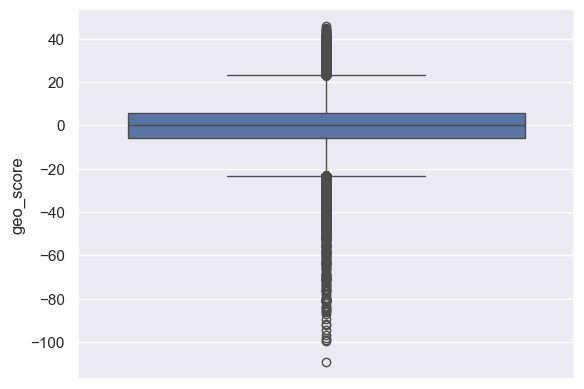

In [12]:
sns.boxplot(y='geo_score', data=geo)
plt.show()

In [13]:
#as there are outliers, we use median to fill the null values instead of mean

geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())

### Filling the null values in 'qset' dataset

In [14]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


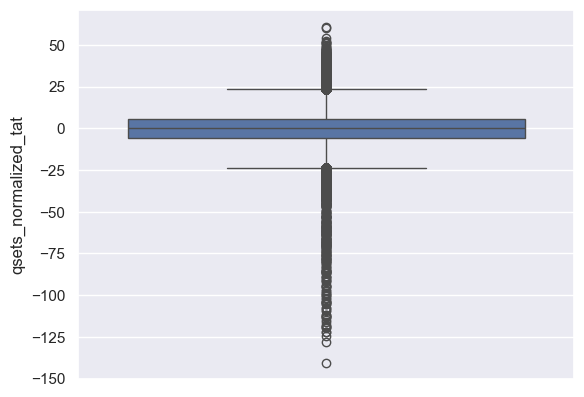

In [15]:
sns.boxplot(y='qsets_normalized_tat', data=qset)
plt.show()

In [16]:
#as there are outliers, we use median to fill the null values instead of mean

qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [17]:
print(geo.isnull().sum()/len(geo)*100)
print('*******************************')
print(qset.isnull().sum()/len(qset)*100)
print('*******************************')

id           0.0
geo_score    0.0
dtype: float64
*******************************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64
*******************************


In [18]:
#now we dont have any null values in any dataset, we can proceed to checking the columns and merging the tables.

In [19]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125


In [20]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0


In [21]:
# All the columns of test and train dataset are same except for the presence of additional column 'Target' in train dataset
# Here 1 means fradulent transaction and 0 means Non-fradulent transaction

train['Target'].value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [22]:
#we add a new column in both dataset to identify if they are from test or train dataset after merging

train['data']='train'
test['data']='test'

In [23]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [24]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [25]:
#adding both test and train dataset together

all_data=pd.concat([train, test], axis=0)

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0 to 56961
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              284807 non-null  int64  
 1   Group           284807 non-null  object 
 2   Per1            284807 non-null  float64
 3   Per2            284807 non-null  float64
 4   Per3            284807 non-null  float64
 5   Per4            284807 non-null  float64
 6   Per5            284807 non-null  float64
 7   Per6            284807 non-null  float64
 8   Per7            284807 non-null  float64
 9   Per8            284807 non-null  float64
 10  Per9            284807 non-null  float64
 11  Dem1            284807 non-null  float64
 12  Dem2            284807 non-null  float64
 13  Dem3            284807 non-null  float64
 14  Dem4            284807 non-null  float64
 15  Dem5            284807 non-null  float64
 16  Dem6            284807 non-null  float64
 17  Dem7            

In [27]:
all_data.shape

(284807, 29)

In [28]:
#Overall 1400 Groups as per data. So lmbda and all_data has same number of Groups

#Unique values of Group column is same in all_data and lmbda data. Hence it can be merged

In [29]:
print('************** Unique ID of the Customer***************')
print('geo', geo['id'].nunique())
print('************************')
print('instance', instance['id'].nunique())
print('************************')
print('qset', qset['id'].nunique())
print('************************')
print('all_data', all_data['id'].nunique())
print('************************')
print('----------------------------------------')
print('************** Unique Group of the Customer***************')
print('lmbda', lmbda['Group'].nunique())
print('************************')
print('all_data', all_data['Group'].nunique())
print('************************')


************** Unique ID of the Customer***************
geo 284807
************************
instance 284807
************************
qset 284807
************************
all_data 284807
************************
----------------------------------------
************** Unique Group of the Customer***************
lmbda 1400
************************
all_data 1400
************************


In [30]:
print(geo.shape)
print('*******************************')
print(instance.shape)
print('*******************************')
print(lmbda.shape)
print('*******************************')
print(qset.shape)
print('*******************************')
print(all_data.shape)
print('*******************************')

(1424035, 2)
*******************************
(1424035, 2)
*******************************
(1400, 2)
*******************************
(1424035, 2)
*******************************
(284807, 29)
*******************************


In [31]:
#there are multiple transactions of single customer, 
#that is why unique values are lower and actual dataset has higher rows
#hence we use group by function to group them

In [32]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,9.034321e-03
std,8.221673e+04,7.628149e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,4.581000e+01


In [33]:
#count of id is higher ie 1424035
#unique customer is 284807
#so if customer withdrew money 10 times, we can take average of them 

In [34]:
#similarly

instance.shape

(1424035, 2)

In [35]:
instance.describe()

,id,instance_scores
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,-2.879143e-06
std,8.221673e+04,2.544506e+00
min,0.000000e+00,-1.231900e+02
25%,7.120100e+04,-6.400000e-01
50%,1.424030e+05,-4.000000e-02
75%,2.136050e+05,5.900000e-01
max,2.848060e+05,1.203500e+02


In [36]:
geo= geo.groupby('id').mean()
instance= instance.groupby('id').mean()
qset= qset.groupby('id').mean()

In [37]:
#now only the unique values are there

print('geo', geo.shape)
print('instance', instance.shape)
print('qset', qset.shape)

geo (284807, 1)
instance (284807, 1)
qset (284807, 1)


In [38]:
all_data.shape

(284807, 29)

In [39]:
lmbda.shape

(1400, 2)

In [40]:
#merging all_data and lmbda using left join

all_data=pd.merge(all_data, lmbda, on='Group', how='left')

In [41]:
all_data.shape

(284807, 30)

In [42]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,0.66


In [43]:
#similarly we shall merge all_data with other datasets 

all_data=pd.merge(all_data, geo, on='id', how='left')

In [44]:
all_data=pd.merge(all_data, instance, on='id', how='left')


In [45]:
all_data=pd.merge(all_data, qset, on='id', how='left')

In [46]:
all_data.shape

(284807, 33)

In [47]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.47,-0.630


In [48]:
#here we can see if its training dataset or testing dataset from column 'data'
#hence we now divide the data into training and testing dataset

train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [49]:
test.shape

(56962, 33)

In [50]:
train.shape

(227845, 33)

In [51]:
#its same number of rows that was there in train and test data when imported

# we can drop a few columns which are not important in model building from these datasets

In [52]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [53]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [54]:
# 'Target' column can be dropped now from test dataset as its missing

test.isnull().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
lambda_wt                   0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
dtype: int

In [55]:
train= train.drop(['id','data'], axis=1) #building a model
test= test.drop(['id','data','Target'], axis=1) #prediction and final result

In [56]:
train.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [57]:
test.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [58]:
# in train dataset, we have to divide it into dependent or target variable(y) and independent(x) variable

x= train.drop(['Target'], axis=1)
y=train['Target']

In [59]:
# we split the data into train and test dataset

# can be sent for building model and testing the model